# 청소년 데이터 빈도 분석

In [106]:
import pandas as pd
import numpy as np

In [107]:
df = pd.read_csv('DS/textdata3-1.csv', encoding = 'utf-8')
df.head()

,contents,result
0,집에 가면 항상 집에서 영화나 다큐멘터리 같은 거 봐요. 위인 있는 동\n영상 보면...,1
1,대학학비 마련이 남아있는데 지금하고 있는 일만으로는 어려울 것 같아\n요. 알바 하...,1
2,일을 해야 하니까 학교 그만둔 걸 숨길 수 없잖아요. 오히려 그것 땜에\n불이익을 ...,1
3,"군인, 경찰, 소방관 뭐 이런 쪽이었어요. 중학교 때까지 유도선수로 뛰었\n기 때문...",1
4,지금까지 학교 그만둔 걸 후회해 본 적이 없었는데 작년에 딱 한 번 복\n교를 생각...,1


In [108]:
from konlpy.tag import Okt
twitter = Okt()

def tokenize(text):
    stems = []
    tagged = twitter.pos(text)
    for i in range(0, len(tagged)):
        if (tagged[i][1] == 'Noun' or tagged[i][1] == 'Adjective' or tagged[i][1] == 'Verb'):
            stems.append(tagged[i][0])
    return stems

tagged = twitter.pos(df['contents'][0])
for i in range (0, len(tagged)):
    if (tagged[i][1]=='Noun'):
        print(tagged[i])

('집', 'Noun')
('가면', 'Noun')
('항상', 'Noun')
('집', 'Noun')
('영화', 'Noun')
('다큐멘터리', 'Noun')
('거', 'Noun')
('위인', 'Noun')
('영상', 'Noun')
('거기', 'Noun')
('도움', 'Noun')
('나', 'Noun')
('정도', 'Noun')
('것', 'Noun')
('별', 'Noun')
('것', 'Noun')
('생각', 'Noun')
('것', 'Noun')


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
text_data_list = df['contents'].astype(str).tolist()
text_data_arr = np.array([''.join(text) for text in text_data_list])

vectorizer = TfidfVectorizer(min_df=2, tokenizer=tokenize, norm='l2')
text_data = vectorizer.fit_transform(text_data_arr)

In [111]:
df_tfidf = pd.DataFrame(text_data.A, columns=vectorizer.get_feature_names())
df_tfidf.head()

,가,가고,가기,가끔,가는,가라앉을,가려고,가면,가서,가야,...,후계,후회,흐,희망,힘,힘든,힘들,힘들고,힘들어,힘들지만
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244662,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.234108,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.141184,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.126704,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [112]:
df_tfidf.to_csv('DS/vectorizer_textdata3-1-1.csv', encoding='cp949')

C:\Users\YC\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\YC\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


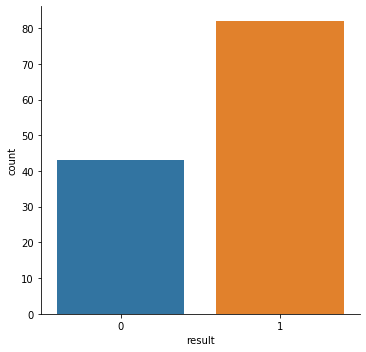

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.factorplot('result', data=df, kind='count', size=5)
g.set_xlabels()

## 분류

In [114]:
#리스트로 변경
contents_data = df['contents'].astype(str).tolist()
contents_label = df['result'].astype(str).tolist()

#데이터 셋 분할
trainset_size = int(round(len(contents_data)*0.70))

x_train = np.array([''.join(data) for data in contents_data[0:trainset_size]])
y_train = np.array([data for data in contents_label[0:trainset_size]])

x_test = np.array([''.join(data) for data in contents_data[trainset_size+1:len(contents_data)]])
y_test = np.array([data for data in contents_label[trainset_size+1:len(contents_label)]])

#문서 단어행렬 생성
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)


In [115]:
df_per = pd.DataFrame(columns=['Classifier', 'F-Measure', 'Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


In [116]:
#성능 평가 패키지
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Naive Bayes

In [117]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB().fit(X_train, y_train)
nb_pre = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pre))
print('\n Classification Report \n')
print(classification_report(y_test,nb_pre))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pre, normalize=True), 2))


 Confusion Matrix 

[[ 0 15]
 [ 0 21]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.58      1.00      0.74        21

    accuracy                           0.58        36
   macro avg       0.29      0.50      0.37        36
weighted avg       0.34      0.58      0.43        36


 Accuracy 

0.58


C:\Users\YC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\YC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\YC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
fm = round(f1_score(y_test, nb_pre, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pre, normalize=True), 2)
df_per.loc[len(df_per)] = ['Naive Bayes', fm, ac]
df_per

C:\Users\YC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.43,0.58


### Decision tree

In [119]:
from sklearn.tree import DecisionTreeClassifier

nb_classifier = DecisionTreeClassifier().fit(X_train, y_train)
nb_pre = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pre))
print('\n Classification Report \n')
print(classification_report(y_test,nb_pre))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pre, normalize=True), 2))


 Confusion Matrix 

[[10  5]
 [ 7 14]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.74      0.67      0.70        21

    accuracy                           0.67        36
   macro avg       0.66      0.67      0.66        36
weighted avg       0.67      0.67      0.67        36


 Accuracy 

0.67


In [120]:
fm = round(f1_score(y_test, nb_pre, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pre, normalize=True), 2)
df_per.loc[len(df_per)] = ['Decision Tree', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.43,0.58
1,Decision Tree,0.67,0.67


### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

nb_classifier = RandomForestClassifier().fit(X_train, y_train)
nb_pre = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pre))
print('\n Classification Report \n')
print(classification_report(y_test,nb_pre))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pre, normalize=True), 2))


 Confusion Matrix 

[[ 4 11]
 [ 3 18]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.57      0.27      0.36        15
           1       0.62      0.86      0.72        21

    accuracy                           0.61        36
   macro avg       0.60      0.56      0.54        36
weighted avg       0.60      0.61      0.57        36


 Accuracy 

0.61


C:\Users\YC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [122]:
fm = round(f1_score(y_test, nb_pre, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pre, normalize=True), 2)
df_per.loc[len(df_per)] = ['Random Forest', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.43,0.58
1,Decision Tree,0.67,0.67
2,Random Forest,0.57,0.61


### SVM

In [123]:
from sklearn.svm import LinearSVC

nb_classifier = LinearSVC().fit(X_train, y_train)
nb_pre = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pre))
print('\n Classification Report \n')
print(classification_report(y_test,nb_pre))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pre, normalize=True), 2))


 Confusion Matrix 

[[ 3 12]
 [ 2 19]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.60      0.20      0.30        15
           1       0.61      0.90      0.73        21

    accuracy                           0.61        36
   macro avg       0.61      0.55      0.52        36
weighted avg       0.61      0.61      0.55        36


 Accuracy 

0.61


In [124]:
fm = round(f1_score(y_test, nb_pre, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pre, normalize=True), 2)
df_per.loc[len(df_per)] = ['SVM', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.43,0.58
1,Decision Tree,0.67,0.67
2,Random Forest,0.57,0.61
3,SVM,0.55,0.61


#### 성능비교

In [125]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.43,0.58
Decision Tree,0.67,0.67
Random Forest,0.57,0.61
SVM,0.55,0.61


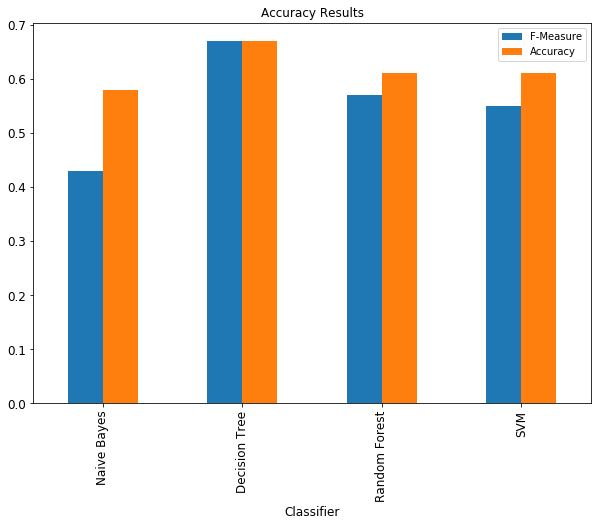

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = df_per_1[['F-Measure', 'Accuracy']].plot(kind='bar', title='Accuracy Results',
                                             figsize=(10,7), legend=True, fontsize=12)
ax.set_xlabel('Classifier', fontsize=12)
plt.show()